### Player 1 distributes the water evenly:
Additional features:
- If the starting position repeats, player 2 is assumed to have won because the strategies for the players will repeat.
- If no glasses overflow after the maximum number of turns, player 2 is assumed to have won because the game is dragged on long enough (Varsity does have to shut at some point)

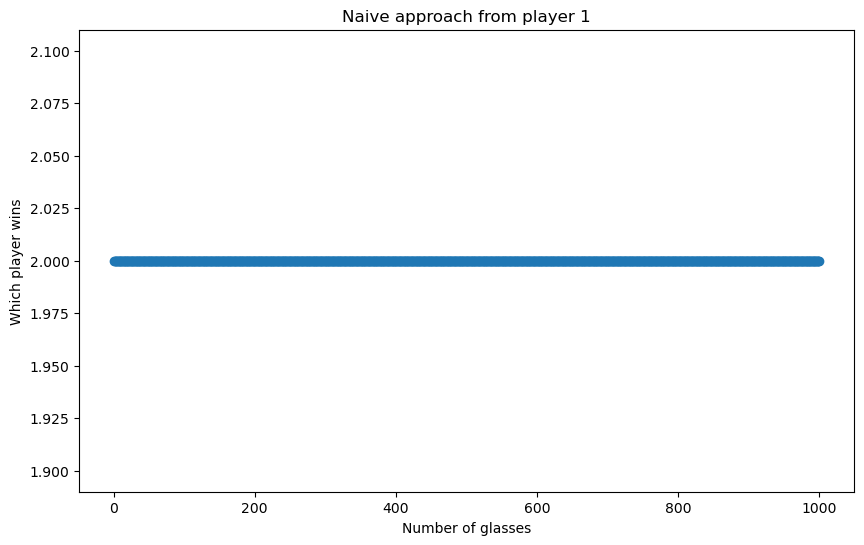

In [248]:
import matplotlib.pyplot as plt

class Game:
    def __init__(self, n, do_outputs=True, k=2, glass_capacity=1.0, water_to_add=0.5):
        self.do_outputs = do_outputs # Whether or not to print text as the game runs
        self.n = n  # Total number of glasses
        self.k = k # Number of adjacent glasses thrown out each turn
        self.glass_capacity = glass_capacity  # Capacity of each glass in pints
        self.water_to_add = water_to_add
        self.glasses = [0.0] * n  # Initialize all glasses as empty
        self.turn = 1  # Turn counter (Player 1 starts)
        self.turn_count = 0  # Track the number of turns
    
    def player1_move(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        print(f"Player 1 is adding {water_to_add} pints of water.")
        for i in range(len(self.glasses)):
            self.glasses[i] += water_to_add / n
            if self.glasses[i] > self.glass_capacity:
                print(f"Glass number {i + 1} has overflown. Player 1 has won.")
                return True # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player1_move_silent(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        for i in range(len(self.glasses)):
            self.glasses[i] += water_to_add / n
            if self.glasses[i] > self.glass_capacity:
                return True # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player2_move(self):
        # Player 2 selects two adjacent glasses and empties them
        print("Player 2 is emptying two adjacent glasses")
        # Finds the pair of adjacent glasses with the most water in them
        max_total = 0
        best_pair = (0, 1)
        for i in range(self.n):
            total = self.glasses[i] + self.glasses[(i + 1) % self.n]
            if total > max_total:
                max_total = total
                best_pair = (i, (i + 1) % self.n)
        # Empties the selected glasses
        self.glasses[best_pair[0]] = 0.0
        self.glasses[best_pair[1]] = 0.0
        print(f"Glasses {best_pair[0] + 1} and {best_pair[1] + 1} have been emptied")
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            print("All glasses are empty, and the starting position has repeated. Player 2 wins")
            return True
        return False
    
    def player2_move_silent(self):
        #Player 2 selects two adjacent glasses and empties them
        # Finds the pair of adjacent glasses with the most water in them
        max_total = 0
        best_pair = (0, 1)
        for i in range(self.n):
            total = self.glasses[i] + self.glasses[(i + 1) % self.n]
            if total> max_total:
                max_total = total
                best_pair = (i, (i + 1) % self.n)
        # Empties the selected glasses
        self.glasses[best_pair[0]] = 0.0
        self.glasses[best_pair[1]] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def play(self, max_turns=100):
        # Break into silent/non-silent cases:
        if self.do_outputs == True:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                print(f"\nTurn {turn}:")
                print(f"Current glass states: {[round(glass, 8) for glass in self.glasses]}")
                if self.turn == 1:
                    if self.player1_move():
                        return "Player 1 wins!"
                else:
                    if self.player2_move():
                        return "Player 2 wins!"
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return "Player 2 wins (no glasses overflowed after maximum turns)"
        else:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                if self.turn == 1:
                    if self.player1_move_silent():
                        return 1
                else:
                    if self.player2_move_silent():
                        return 2
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return 2

xs = []
ys = []
for n in range(1, 1001):
    game = Game(n, False)
    result = game.play(100)
    xs.append(n)
    ys.append(result)

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys)
plt.xlabel("Number of glasses")
plt.ylabel("Which player wins")
plt.title("Naive approach from player 1")
plt.show()

### Player 1 distributes water evenly amongst glasses that haven't been thrown out yet

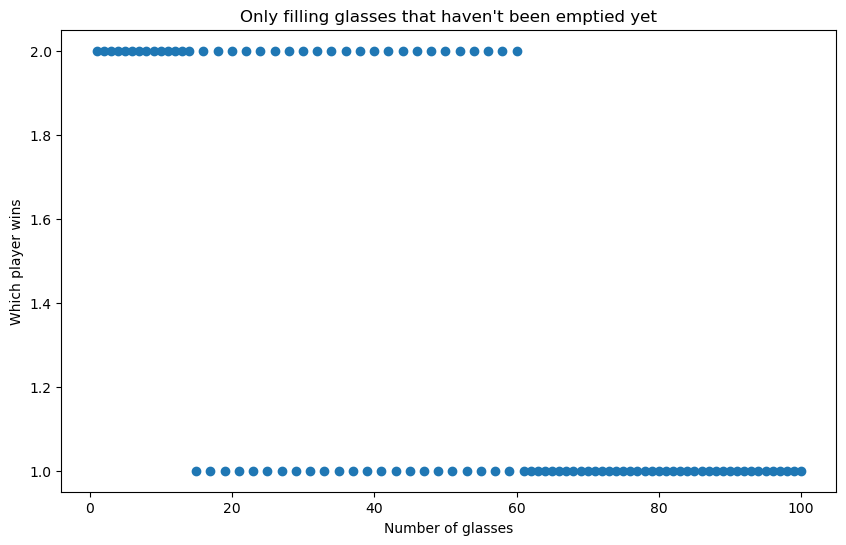

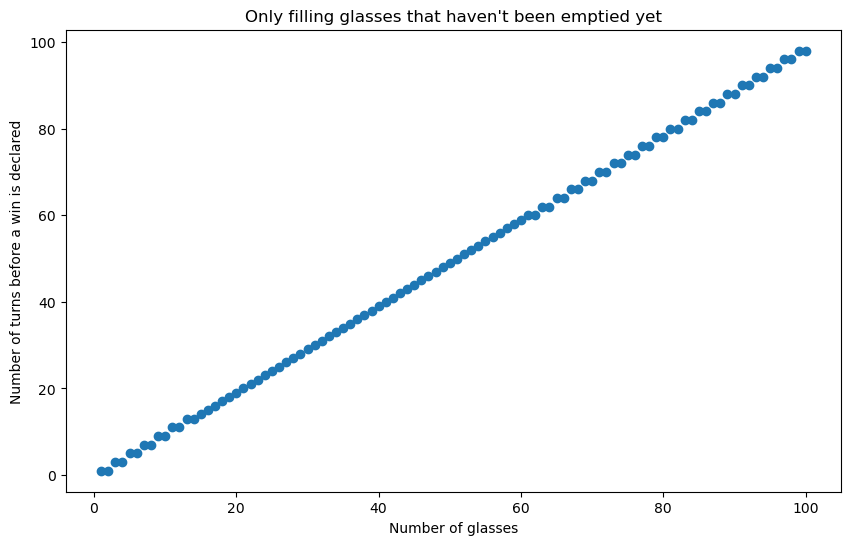

[15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]


In [276]:
import matplotlib.pyplot as plt

class Game:
    def __init__(self, n, do_outputs=True, k=2, glass_capacity=1.0, water_to_add=0.5):
        self.do_outputs = do_outputs # Whether or not to print text as the game runs
        self.n = n  # Total number of glasses
        self.k = k # Number of adjacent glasses thrown out each turn
        self.glass_capacity = glass_capacity  # Capacity of each glass in pints
        self.water_to_add = water_to_add
        self.glasses = [0.0] * n  # Initialize all glasses as empty
        self.turn = 1  # Turn counter (Player 1 starts)
        self.turn_count = 0  # Track the number of turns
    
    def player1_move(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        print(f"Player 1 is adding {water_to_add} pints of water.")
        max_water = max(self.glasses)
        target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
        water_per_glass = water_to_add / len(target_glasses)
        for i in target_glasses:
            self.glasses[i] += water_per_glass
            if self.glasses[i] > self.glass_capacity:
                print(f"Glass number {i + 1} has overflown. Player 1 has won.")
                return True # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player1_move_silent(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        max_water = max(self.glasses)
        target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
        water_per_glass = water_to_add / len(target_glasses)
        for i in target_glasses:
            self.glasses[i] += water_per_glass
            if self.glasses[i] > self.glass_capacity:
                return True # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player2_move(self):
        # Player 2 selects two adjacent glasses and empties them
        print("Player 2 is emptying two adjacent glasses")
        # Finds the pair of adjacent glasses with the most water in them
        max_total = 0
        best_pair = (0, 1)
        for i in range(self.n):
            total = self.glasses[i] + self.glasses[(i + 1) % self.n]
            if total > max_total:
                max_total = total
                best_pair = (i, (i + 1) % self.n)
        # Empties the selected glasses
        self.glasses[best_pair[0]] = 0.0
        self.glasses[best_pair[1]] = 0.0
        print(f"Glasses {best_pair[0] + 1} and {best_pair[1] + 1} have been emptied")
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            print("All glasses are empty, and the starting position has repeated. Player 2 wins")
            return True
        return False
    
    def player2_move_silent(self):
        #Player 2 selects two adjacent glasses and empties them
        # Finds the pair of adjacent glasses with the most water in them
        max_total = 0
        best_pair = (0, 1)
        for i in range(self.n):
            total = self.glasses[i] + self.glasses[(i + 1) % self.n]
            if total> max_total:
                max_total = total
                best_pair = (i, (i + 1) % self.n)
        # Empties the selected glasses
        self.glasses[best_pair[0]] = 0.0
        self.glasses[best_pair[1]] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def play(self, max_turns=500):
        # Break into silent/non-silent cases:
        if self.do_outputs == True:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                print(f"\nTurn {turn}:")
                print(f"Current glass states: {[round(glass, 8) for glass in self.glasses]}")
                if self.turn == 1:
                    if self.player1_move():
                        return "Player 1 wins!"
                else:
                    if self.player2_move():
                        return "Player 2 wins!"
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return "Player 2 wins (no glasses overflowed after maximum turns)"
        else:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                if self.turn == 1:
                    if self.player1_move_silent():
                        return (1, self.turn_count)
                else:
                    if self.player2_move_silent():
                        return (2, self.turn_count)
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return (2, self.turn_count)

xs = []
ys = []
zs = []
for n in range(1, 101):
    game = Game(n, False)
    result = game.play(2*n)
    xs.append(n)
    ys.append(result[0])
    zs.append(result[1])

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys)
plt.xlabel("Number of glasses")
plt.ylabel("Which player wins")
plt.title("Only filling glasses that haven't been emptied yet")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(xs, zs)
plt.xlabel("Number of glasses")
plt.ylabel("Number of turns before a win is declared")
plt.title("Only filling glasses that haven't been emptied yet")
plt.show()

player1_wins = [xs[i] for i in range(len(xs)) if ys[i] == 1]
player2_wins = [xs[i] for i in range(len(xs)) if ys[i] == 2]
print(player1_wins)
print(player2_wins)

### Player 1 distributes water evenly amongst glasses that haven't been thrown out yet, but checks if there is a glass that can be overflowed first

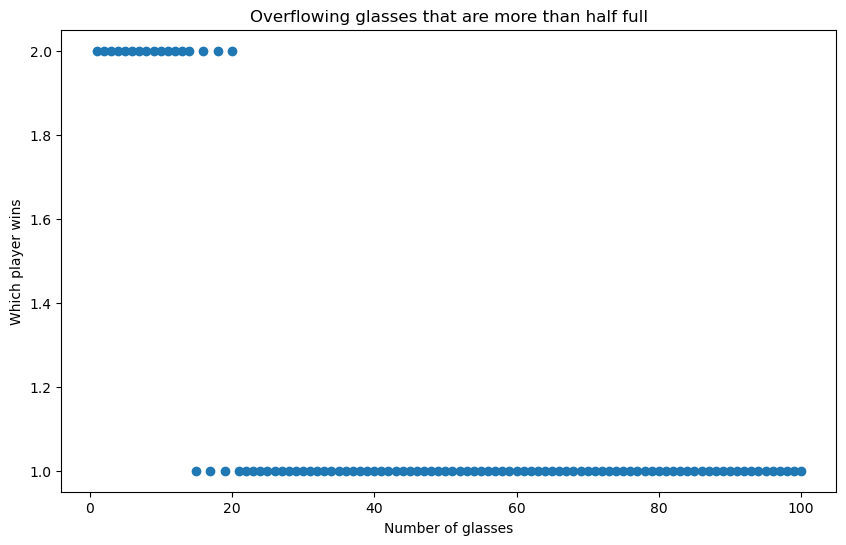

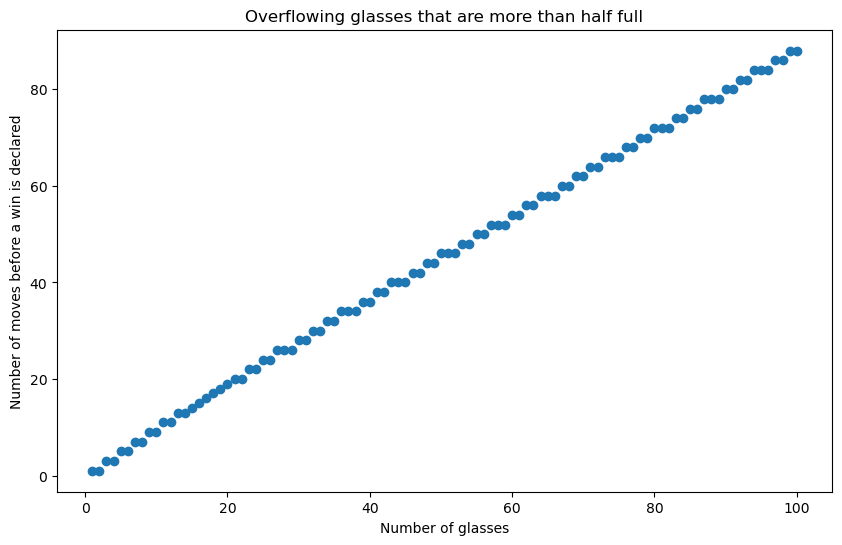

[15, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 20]


In [270]:
import matplotlib.pyplot as plt

class Game:
    def __init__(self, n, do_outputs=True, k=2, glass_capacity=1.0, water_to_add=0.5):
        self.do_outputs = do_outputs # Whether or not to print text as the game runs
        self.n = n  # Total number of glasses
        self.k = k # Number of adjacent glasses thrown out each turn
        self.glass_capacity = glass_capacity  # Capacity of each glass in pints
        self.water_to_add = water_to_add
        self.glasses = [0.0] * n  # Initialize all glasses as empty
        self.turn = 1  # Turn counter (Player 1 starts)
        self.turn_count = 0  # Track the number of turns
    
    def player1_move(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        print(f"Player 1 is adding {water_to_add} pints of water.")
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > 0.5]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                print(f"Glass number {target_glass + 1} has overflown. Player 1 has won.")
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    print(f"Glass number {i + 1} has overflown. Player 1 has won..")
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player1_move_silent(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > 0.5]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player2_move(self):
        # Player 2 selects two adjacent glasses and empties them
        print("Player 2 is emptying two adjacent glasses")
        # Finds the pair of adjacent glasses with the most water in them
        max_total = 0
        best_pair = (0, 1)
        for i in range(self.n):
            total = self.glasses[i] + self.glasses[(i + 1) % self.n]
            if total > max_total:
                max_total = total
                best_pair = (i, (i + 1) % self.n)
        # Empties the selected glasses
        self.glasses[best_pair[0]] = 0.0
        self.glasses[best_pair[1]] = 0.0
        print(f"Glasses {best_pair[0] + 1} and {best_pair[1] + 1} have been emptied")
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            print("All glasses are empty, and the starting position has repeated. Player 2 wins")
            return True
        return False
    
    def player2_move_silent(self):
        #Player 2 selects two adjacent glasses and empties them
        # Finds the pair of adjacent glasses with the most water in them
        max_total = 0
        best_pair = (0, 1)
        for i in range(self.n):
            total = self.glasses[i] + self.glasses[(i + 1) % self.n]
            if total> max_total:
                max_total = total
                best_pair = (i, (i + 1) % self.n)
        # Empties the selected glasses
        self.glasses[best_pair[0]] = 0.0
        self.glasses[best_pair[1]] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def play(self, max_turns=500):
        # Break into silent/non-silent cases:
        if self.do_outputs == True:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                print(f"\nTurn {turn}:")
                print(f"Current glass states: {[round(glass, 8) for glass in self.glasses]}")
                if self.turn == 1:
                    if self.player1_move():
                        return "Player 1 wins!"
                else:
                    if self.player2_move():
                        return "Player 2 wins!"
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return "Player 2 wins (no glasses overflowed after maximum turns)"
        else:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                if self.turn == 1:
                    if self.player1_move_silent():
                        return (1, self.turn_count)
                else:
                    if self.player2_move_silent():
                        return (2, self.turn_count)
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return (2, self.turn_count)

xs = []
ys = []
zs = []
for n in range(1, 101):
    game = Game(n, False)
    result = game.play(100 + 2*n)
    xs.append(n)
    ys.append(result[0])
    zs.append(result[1])

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys)
plt.xlabel("Number of glasses")
plt.ylabel("Which player wins")
plt.title("Overflowing glasses that are more than half full")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(xs, zs)
plt.xlabel("Number of glasses")
plt.ylabel("Number of moves before a win is declared")
plt.title("Overflowing glasses that are more than half full")
plt.show()

player1_wins = [xs[i] for i in range(len(xs)) if ys[i] == 1]
player2_wins = [xs[i] for i in range(len(xs)) if ys[i] == 2]
print(player1_wins)
print(player2_wins)

### Player 1 now only fills every other glass


Turn 1:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Player 1 is adding 0.5 pints of water.

Turn 2:
Current glass states: [0.125, 0.0, 0.125, 0.0, 0.125, 0.0, 0.125, 0.0]
Player 2 is emptying two adjacent glasses
Glasses 1 and 2 have been emptied

Turn 3:
Current glass states: [0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0.125, 0.0]
Player 1 is adding 0.5 pints of water.

Turn 4:
Current glass states: [0.0, 0.0, 0.29166667, 0.0, 0.29166667, 0.0, 0.29166667, 0.0]
Player 2 is emptying two adjacent glasses
Glasses 2 and 3 have been emptied

Turn 5:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.29166667, 0.0, 0.29166667, 0.0]
Player 1 is adding 0.5 pints of water.

Turn 6:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.54166667, 0.0, 0.54166667, 0.0]
Player 2 is emptying two adjacent glasses
Glasses 4 and 5 have been emptied

Turn 7:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54166667, 0.0]
Player 1 is adding 0.5 pints of water.
Glass number 7 has overflown. Player 1 has

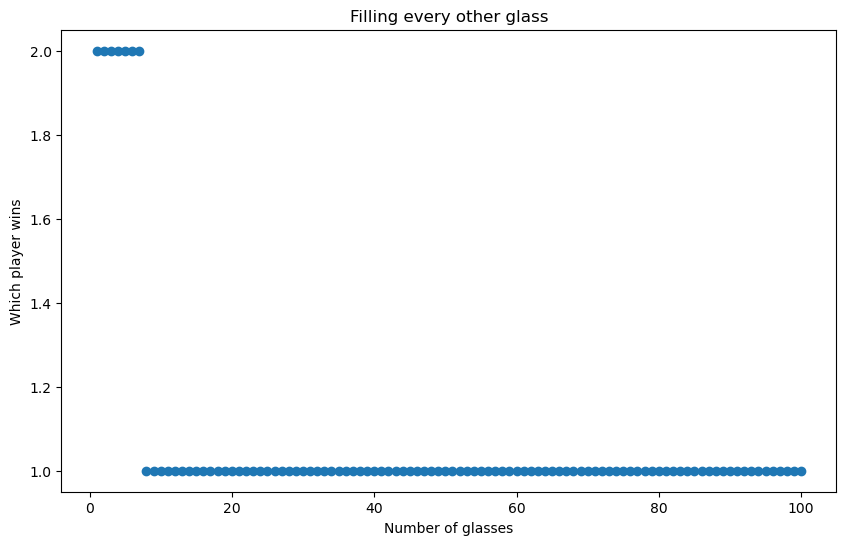

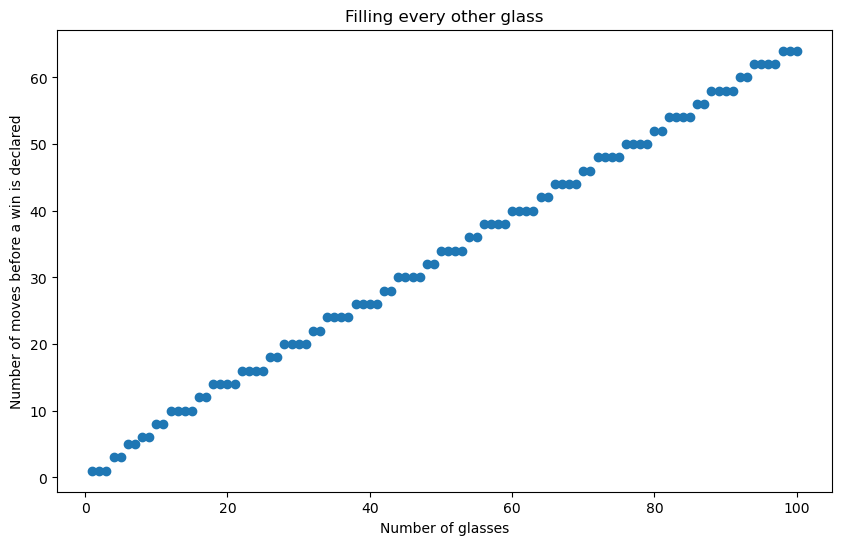

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7]


In [271]:
import matplotlib.pyplot as plt

class Game:
    def __init__(self, n, do_outputs=True, k=2, glass_capacity=1.0, water_to_add=0.5):
        self.do_outputs = do_outputs # Whether or not to print text as the game runs
        self.n = n  # Total number of glasses
        self.k = k # Number of adjacent glasses thrown out each turn
        self.glass_capacity = glass_capacity  # Capacity of each glass in pints
        self.water_to_add = water_to_add
        self.glasses = [0.0] * n  # Initialize all glasses as empty
        self.turn = 1  # Turn counter (Player 1 starts)
        self.turn_count = 0  # Track the number of turns
    
    def player1_move(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        print(f"Player 1 is adding {water_to_add} pints of water.")
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            for i in range(self.n // 2):
                self.glasses[2 * i] += water_to_add / (self.n // 2)
            return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > 0.5]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                print(f"Glass number {target_glass + 1} has overflown. Player 1 has won.")
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    print(f"Glass number {i + 1} has overflown. Player 1 has won.")
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player1_move_silent(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            for i in range(self.n // 2):
                self.glasses[2 * i] += water_to_add / (self.n // 2)
            return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > 0.5]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player2_move(self):
        # Player 2 selects two adjacent glasses and empties them
        print("Player 2 is emptying two adjacent glasses")
        if self.n == 1:
            self.glasses[0] = 0.0
            print(f"Glasses 1 and 1 have been emptied")
        else:
            # Finds the pair of adjacent glasses with the most water in them
            max_total = 0
            best_pair = (0, 1)
            for i in range(self.n):
                total = self.glasses[i] + self.glasses[(i + 1) % self.n]
                if total > max_total:
                    max_total = total
                    best_pair = (i, (i + 1) % self.n)
            # Empty the selected glasses
            self.glasses[best_pair[0]] = 0.0
            self.glasses[best_pair[1]] = 0.0
            print(f"Glasses {best_pair[0] + 1} and {best_pair[1] + 1} have been emptied")
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            print("All glasses are empty, and the starting position has repeated. Player 2 wins")
            return True
        return False
    
    def player2_move_silent(self):
        # Player 2 selects two adjacent glasses and empties them
        if self.n == 1:
            self.glasses[0] = 0.0
        else:
            # Finds the pair of adjacent glasses with the most water in them
            max_total = 0
            best_pair = (0, 1)
            for i in range(self.n):
                total = self.glasses[i] + self.glasses[(i + 1) % self.n]
                if total > max_total:
                    max_total = total
                    best_pair = (i, (i + 1) % self.n)
            # Empty the selected glasses
            self.glasses[best_pair[0]] = 0.0
            self.glasses[best_pair[1]] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def play(self, max_turns=500):
        # Break into silent/non-silent cases:
        if self.do_outputs == True:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                print(f"\nTurn {turn}:")
                print(f"Current glass states: {[round(glass, 8) for glass in self.glasses]}")
                if self.turn == 1:
                    if self.player1_move():
                        return "Player 1 wins!"
                else:
                    if self.player2_move():
                        return "Player 2 wins!"
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return "Player 2 wins (no glasses overflowed after maximum turns)"
        else:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                if self.turn == 1:
                    if self.player1_move_silent():
                        return (1, self.turn_count)
                else:
                    if self.player2_move_silent():
                        return (2, self.turn_count)
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return (2, self.turn_count)

n = 8
game = Game(n, True)
result = game.play(100+2*n)
print(result)
xs = []
ys = []
zs = []
for n in range(1, 101):
    game = Game(n, False)
    result = game.play(100 + 2*n)
    xs.append(n)
    ys.append(result[0])
    zs.append(result[1])

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys)
plt.xlabel("Number of glasses")
plt.ylabel("Which player wins")
plt.title("Filling every other glass")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(xs, zs)
plt.xlabel("Number of glasses")
plt.ylabel("Number of moves before a win is declared")
plt.title("Filling every other glass")
plt.show()

player1_wins = [xs[i] for i in range(len(xs)) if ys[i] == 1]
player2_wins = [xs[i] for i in range(len(xs)) if ys[i] == 2]
print(player1_wins)
print(player2_wins)

### Player 1 only employs the best strategy for the first 8 glasses


Turn 1:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Player 1 is adding 0.5 pints of water.

Turn 2:
Current glass states: [0.125, 0.0, 0.125, 0.0, 0.125, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Player 2 is emptying two adjacent glasses
Glasses 1 and 2 have been emptied

Turn 3:
Current glass states: [0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Player 1 is adding 0.5 pints of water.

Turn 4:
Current glass states: [0.0, 0.0, 0.29166667, 0.0, 0.29166667, 0.0, 0.29166667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Player 2 is emptying two adjacent glasses
Glasses 2 and 3 have been emptied

Turn 5:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.29166667, 0.0, 0.29166667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Player 1 is adding 0.5 pints of water.

Turn 6:
Current glass

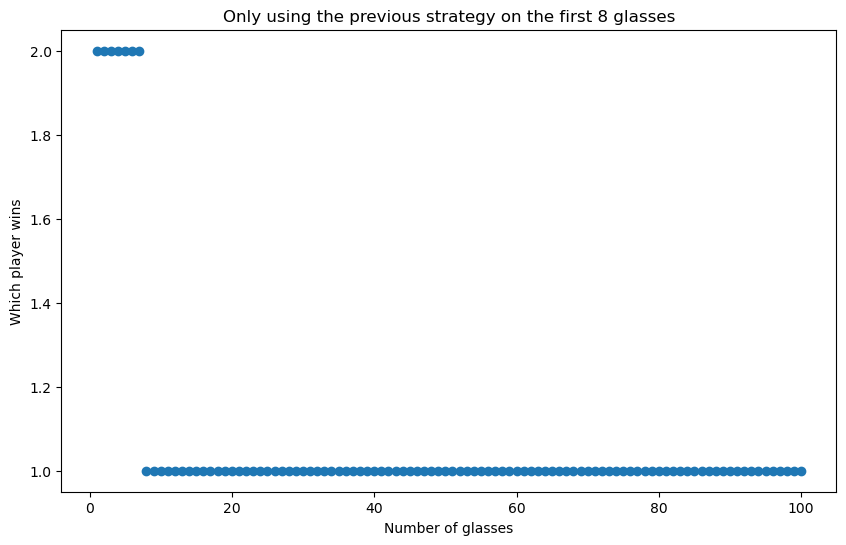

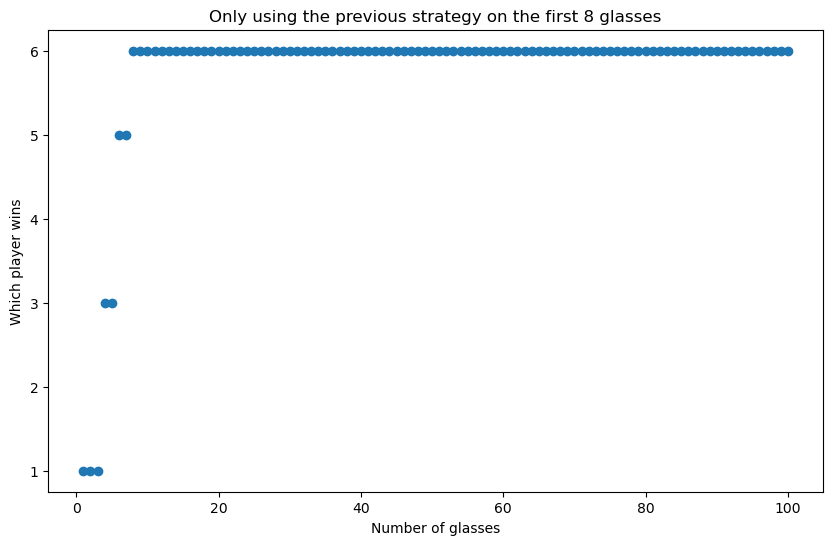

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7]


In [272]:
import matplotlib.pyplot as plt

class Game:
    def __init__(self, n, do_outputs=True, k=2, glass_capacity=1.0, water_to_add=0.5):
        self.do_outputs = do_outputs # Whether or not to print text as the game runs
        self.n = n  # Total number of glasses
        self.k = k # Number of adjacent glasses thrown out each turn
        self.glass_capacity = glass_capacity  # Capacity of each glass in pints
        self.water_to_add = water_to_add
        self.glasses = [0.0] * n  # Initialize all glasses as empty
        self.turn = 1  # Turn counter (Player 1 starts)
        self.turn_count = 0  # Track the number of turns
    
    def player1_move(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        print(f"Player 1 is adding {water_to_add} pints of water.")
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            if self.n >= 8:
                # We will only consider the first 8 glasses in this case
                if self.turn_count == 0:
                    for i in range(4):
                        self.glasses[2 * i] += water_to_add / 4
                return False # Player 1 has not won on this turn
            else:
                for i in range(self.n // 2):
                    self.glasses[2 * i] += water_to_add / (self.n // 2)
                return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > 0.5]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                print(f"Glass number {target_glass + 1} has overflown. Player 1 has won.")
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    print(f"Glass number {i + 1} has overflown. Player 1 has won.")
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player1_move_silent(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            if self.n >= 8:
                # We will only consider the first 8 glasses in this case
                if self.turn_count == 0:
                    for i in range(4):
                        self.glasses[2 * i] += water_to_add / 4
                return False # Player 1 has not won on this turn
            else:
                for i in range(self.n // 2):
                    self.glasses[2 * i] += water_to_add / (self.n // 2)
                return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > 0.5]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player2_move(self):
        # Player 2 selects two adjacent glasses and empties them
        print("Player 2 is emptying two adjacent glasses")
        if self.n == 1:
            self.glasses[0] = 0.0
            print(f"Glasses 1 and 1 have been emptied")
        else:
            # Finds the pair of adjacent glasses with the most water in them
            max_total = 0
            best_pair = (0, 1)
            for i in range(self.n):
                total = self.glasses[i] + self.glasses[(i + 1) % self.n]
                if total > max_total:
                    max_total = total
                    best_pair = (i, (i + 1) % self.n)
            # Empty the selected glasses
            self.glasses[best_pair[0]] = 0.0
            self.glasses[best_pair[1]] = 0.0
            print(f"Glasses {best_pair[0] + 1} and {best_pair[1] + 1} have been emptied")
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            print("All glasses are empty, and the starting position has repeated. Player 2 wins")
            return True
        return False
    
    def player2_move_silent(self):
        # Player 2 selects two adjacent glasses and empties them
        if self.n == 1:
            self.glasses[0] = 0.0
        else:
            # Finds the pair of adjacent glasses with the most water in them
            max_total = 0
            best_pair = (0, 1)
            for i in range(self.n):
                total = self.glasses[i] + self.glasses[(i + 1) % self.n]
                if total > max_total:
                    max_total = total
                    best_pair = (i, (i + 1) % self.n)
            # Empty the selected glasses
            self.glasses[best_pair[0]] = 0.0
            self.glasses[best_pair[1]] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def play(self, max_turns=500):
        # Break into silent/non-silent cases:
        if self.do_outputs == True:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                print(f"\nTurn {turn}:")
                print(f"Current glass states: {[round(glass, 8) for glass in self.glasses]}")
                if self.turn == 1:
                    if self.player1_move():
                        return "Player 1 wins!"
                else:
                    if self.player2_move():
                        return "Player 2 wins!"
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return "Player 2 wins (no glasses overflowed after maximum turns)"
        else:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                if self.turn == 1:
                    if self.player1_move_silent():
                        return (1, self.turn_count)
                else:
                    if self.player2_move_silent():
                        return (2, self.turn_count)
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return (2, self.turn_count)

n = 20
game = Game(n, True)
result = game.play(100+2*n)
print(result)
xs = []
ys = []
zs = []
for n in range(1, 101):
    game = Game(n, False)
    result = game.play(100 + 2*n)
    xs.append(n)
    ys.append(result[0])
    zs.append(result[1])
    
plt.figure(figsize=(10, 6))
plt.scatter(xs, ys)
plt.xlabel("Number of glasses")
plt.ylabel("Which player wins")
plt.title("Only using the previous strategy on the first 8 glasses")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(xs, zs)
plt.xlabel("Number of glasses")
plt.ylabel("Which player wins")
plt.title("Only using the previous strategy on the first 8 glasses")
plt.show()

player1_wins = [xs[i] for i in range(len(xs)) if ys[i] == 1]
player2_wins = [xs[i] for i in range(len(xs)) if ys[i] == 2]
print(player1_wins)
print(player2_wins)

### Removing the adjacency requirement


Turn 1:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Player 1 is adding 0.5 pints of water.

Turn 2:
Current glass states: [0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.0]
Player 2 is emptying two glasses
Glasses 1 and 3 have been emptied

Turn 3:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.0]
Player 1 is adding 0.5 pints of water.

Turn 4:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.0]
Player 2 is emptying two glasses
Glasses 5 and 7 have been emptied

Turn 5:
Current glass states: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.1125, 0.0, 0.0]
Player 1 is adding 0.5 pints of water.

Tur

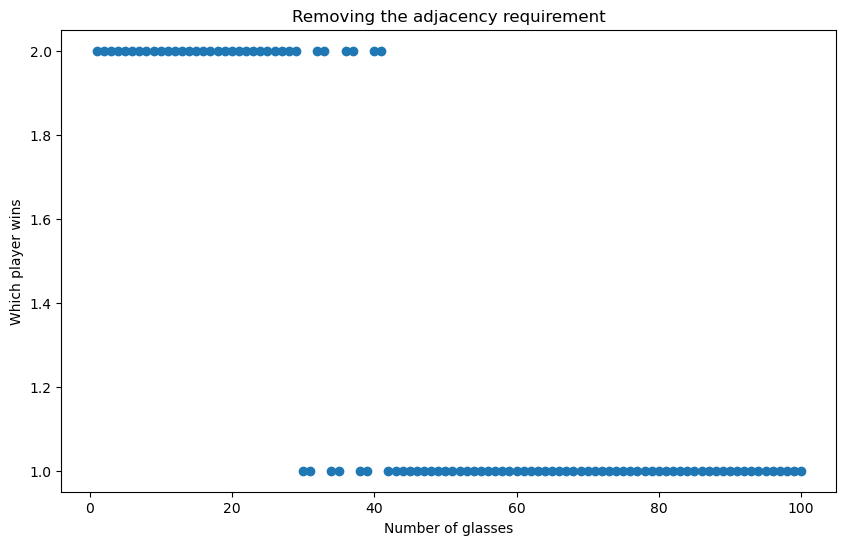

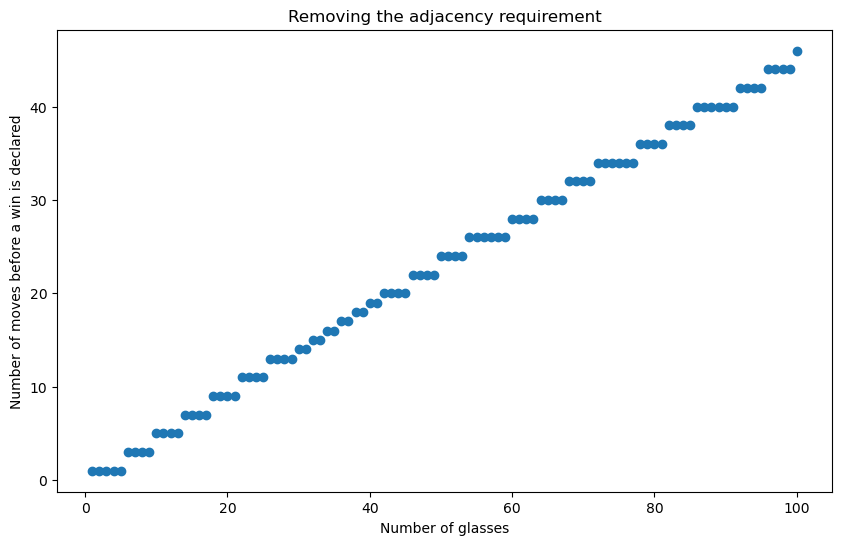

[30, 31, 34, 35, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32, 33, 36, 37, 40, 41]


In [273]:
import matplotlib.pyplot as plt

class Game:
    def __init__(self, n, do_outputs=True, k=2, glass_capacity=1.0, water_to_add=0.5):
        self.do_outputs = do_outputs # Whether or not to print text as the game runs
        self.n = n  # Total number of glasses
        self.k = k # Number of adjacent glasses thrown out each turn
        self.glass_capacity = glass_capacity  # Capacity of each glass in pints
        self.water_to_add = water_to_add
        self.glasses = [0.0] * n  # Initialize all glasses as empty
        self.turn = 1  # Turn counter (Player 1 starts)
        self.turn_count = 0  # Track the number of turns
    
    def player1_move(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        print(f"Player 1 is adding {water_to_add} pints of water.")
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            for i in range(self.n // 2):
                self.glasses[2 * i] += water_to_add / (self.n // 2)
            return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > 0.5]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                print(f"Glass number {target_glass + 1} has overflown. Player 1 has won.")
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    print(f"Glass number {i + 1} has overflown. Player 1 has won.")
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player1_move_silent(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = 0.5
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            for i in range(self.n // 2):
                self.glasses[2 * i] += water_to_add / (self.n // 2)
            return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > 0.5]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player2_move(self):
        # Player 2 selects two glasses and empties them
        print("Player 2 is emptying two glasses")
        # Finds the pair of glasses with the most water in them
        max_total = 0
        best_set = [0] * 2
        for i in range(self.n):
            for j in range(i):
                total = self.glasses[i] + self.glasses[j]
                if total > max_total:
                    max_total = total
                    best_set = [j, i]
        # Empties the selected glasses
        for i in range(2):
            self.glasses[best_set[i]] = 0.0
        print(f"Glasses {best_set[0] + 1} and {best_set[1] + 1} have been emptied")
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            print("All glasses are empty, and the starting position has repeated. Player 2 wins")
            return True
        return False
    
    def player2_move_silent(self):
        # Player 2 selects two glasses and empties them        
        # Finds the pair of glasses with the most water in them
        max_total = 0
        best_set = [0] * 2
        for i in range(self.n):
            for j in range(i):
                total = self.glasses[i] + self.glasses[j]
                if total > max_total:
                    max_total = total
                    best_set = [j, i]
        # Empties the selected glasses
        for i in range(2):
            self.glasses[best_set[i]] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def play(self, max_turns=500):
        # Break into silent/non-silent cases:
        if self.do_outputs == True:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                print(f"\nTurn {turn}:")
                print(f"Current glass states: {[round(glass, 8) for glass in self.glasses]}")
                if self.turn == 1:
                    if self.player1_move():
                        return "Player 1 wins!"
                else:
                    if self.player2_move():
                        return "Player 2 wins!"
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return "Player 2 wins (no glasses overflowed after maximum turns)"
        else:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                if self.turn == 1:
                    if self.player1_move_silent():
                        return (1, self.turn_count)
                else:
                    if self.player2_move_silent():
                        return (2, self.turn_count)
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return (2, self.turn_count)

n = 21
game = Game(n)
result = game.play(100+2*n)
print(result)
xs = []
ys = []
zs = []
for n in range(1, 101):
    game = Game(n, False)
    result = game.play(100 + 2*n)
    xs.append(n)
    ys.append(result[0])
    zs.append(result[1])

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys)
plt.xlabel("Number of glasses")
plt.ylabel("Which player wins")
plt.title("Removing the adjacency requirement")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(xs, zs)
plt.xlabel("Number of glasses")
plt.ylabel("Number of moves before a win is declared")
plt.title("Removing the adjacency requirement")
plt.show()

player1_wins = [xs[i] for i in range(len(xs)) if ys[i] == 1]
player2_wins = [xs[i] for i in range(len(xs)) if ys[i] == 2]
print(player1_wins)
print(player2_wins)

### Changing how much water player 1 gets to distribute

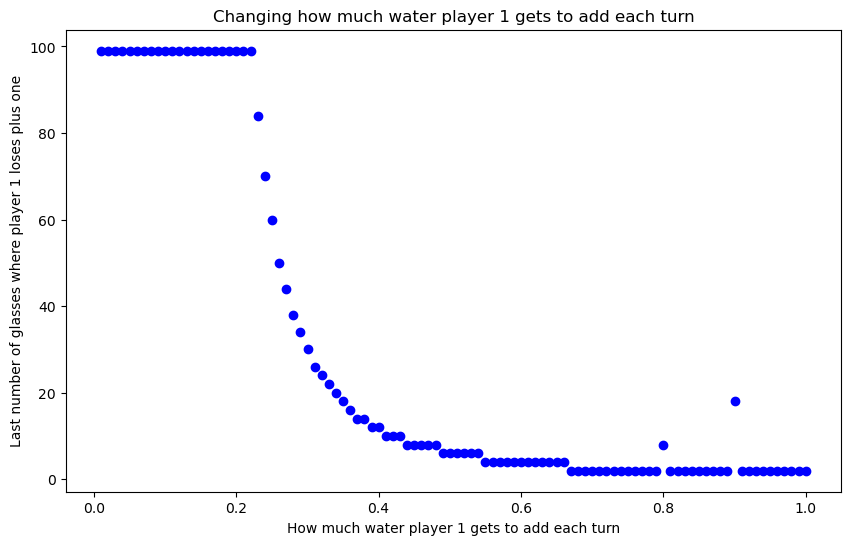

[(0.01, 99), (0.02, 99), (0.03, 99), (0.04, 99), (0.05, 99), (0.06, 99), (0.07, 99), (0.08, 99), (0.09, 99), (0.1, 99), (0.11, 99), (0.12, 99), (0.13, 99), (0.14, 99), (0.15, 99), (0.16, 99), (0.17, 99), (0.18, 99), (0.19, 99), (0.2, 99), (0.21, 99), (0.22, 99), (0.23, 84), (0.24, 70), (0.25, 60), (0.26, 50), (0.27, 44), (0.28, 38), (0.29, 34), (0.3, 30), (0.31, 26), (0.32, 24), (0.33, 22), (0.34, 20), (0.35, 18), (0.36, 16), (0.37, 14), (0.38, 14), (0.39, 12), (0.4, 12), (0.41, 10), (0.42, 10), (0.43, 10), (0.44, 8), (0.45, 8), (0.46, 8), (0.47, 8), (0.48, 8), (0.49, 6), (0.5, 6), (0.51, 6), (0.52, 6), (0.53, 6), (0.54, 6), (0.55, 4), (0.56, 4), (0.57, 4), (0.58, 4), (0.59, 4), (0.6, 4), (0.61, 4), (0.62, 4), (0.63, 4), (0.64, 4), (0.65, 4), (0.66, 4), (0.67, 2), (0.68, 2), (0.69, 2), (0.7, 2), (0.71, 2), (0.72, 2), (0.73, 2), (0.74, 2), (0.75, 2), (0.76, 2), (0.77, 2), (0.78, 2), (0.79, 2), (0.8, 8), (0.81, 2), (0.82, 2), (0.83, 2), (0.84, 2), (0.85, 2), (0.86, 2), (0.87, 2), (0.88, 

In [274]:
import matplotlib.pyplot as plt

class Game:
    def __init__(self, n, do_outputs=True, k=2, glass_capacity=1.0, water_to_add=0.5):
        self.do_outputs = do_outputs # Whether or not to print text as the game runs
        self.n = n  # Total number of glasses
        self.k = k # Number of adjacent glasses thrown out each turn
        self.glass_capacity = glass_capacity  # Capacity of each glass in pints
        self.water_to_add = water_to_add
        self.glasses = [0.0] * n  # Initialize all glasses as empty
        self.turn = 1  # Turn counter (Player 1 starts)
        self.turn_count = 0  # Track the number of turns
    
    def player1_move(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = self.water_to_add
        print(f"Player 1 is adding {water_to_add} pints of water.")
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            for i in range(self.n // 2):
                self.glasses[2 * i] += water_to_add / (self.n // 2)
            return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > self.glass_capacity - self.water_to_add]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                print(f"Glass number {target_glass + 1} has overflown. Player 1 has won.")
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    print(f"Glass number {i + 1} has overflown. Player 1 has won.")
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player1_move_silent(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = self.water_to_add
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            for i in range(self.n // 2):
                self.glasses[2 * i] += water_to_add / (self.n // 2)
            return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > self.glass_capacity - self.water_to_add]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player2_move(self):
        # Player 2 selects two adjacent glasses and empties them
        print("Player 2 is emptying two adjacent glasses")
        if self.n == 1:
            self.glasses[0] = 0.0
            print(f"Glasses 1 and 1 have been emptied")
        else:
            # Finds the pair of adjacent glasses with the most water in them
            max_total = 0
            best_pair = (0, 1)
            for i in range(self.n):
                total = self.glasses[i] + self.glasses[(i + 1) % self.n]
                if total > max_total:
                    max_total = total
                    best_pair = (i, (i + 1) % self.n)
            # Empty the selected glasses
            self.glasses[best_pair[0]] = 0.0
            self.glasses[best_pair[1]] = 0.0
            print(f"Glasses {best_pair[0] + 1} and {best_pair[1] + 1} have been emptied")
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            print("All glasses are empty, and the starting position has repeated. Player 2 wins")
            return True
        return False
    
    def player2_move_silent(self):
        # Player 2 selects two adjacent glasses and empties them
        if self.n == 1:
            self.glasses[0] = 0.0
        else:
            # Finds the pair of adjacent glasses with the most water in them
            max_total = 0
            best_pair = (0, 1)
            for i in range(self.n):
                total = self.glasses[i] + self.glasses[(i + 1) % self.n]
                if total > max_total:
                    max_total = total
                    best_pair = (i, (i + 1) % self.n)
            # Empty the selected glasses
            self.glasses[best_pair[0]] = 0.0
            self.glasses[best_pair[1]] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def play(self, max_turns=500):
        # Break into silent/non-silent cases:
        if self.do_outputs == True:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                print(f"\nTurn {turn}:")
                print(f"Current glass states: {[round(glass, 8) for glass in self.glasses]}")
                if self.turn == 1:
                    if self.player1_move():
                        return "Player 1 wins!"
                else:
                    if self.player2_move():
                        return "Player 2 wins!"
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return "Player 2 wins (no glasses overflowed after maximum turns)"
        else:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                if self.turn == 1:
                    if self.player1_move_silent():
                        return 1
                else:
                    if self.player2_move_silent():
                        return 2
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return 2

def compute_game_results(max_n, max_i):
    results = []
    for i in range(1, max_i + 1):
        iresults = []
        for n in range(1, max_n + 1):
            game = Game(n, False, 2, 1.0, i / max_i)
            result = game.play(100 + (2 * n))
            iresults.append(result)
        results.append(iresults)
    return results

def p1_wins_above(results, max_n, max_i):
    max_n_results = []
    for i in range(0, max_i):
        iresults = results[i]
        all_player1 = True
        last_win = max_n
        for n in range(max_n - 1, 0, -1):
            if iresults[n] != 1:
                all_player1 = False
                last_win = n
                break
        max_n_results.append(last_win)
    return max_n_results

def p2_wins_below(results, max_n, max_i):
    min_n_results = []
    for i in range(0, max_i):
        iresults = results[i]
        all_player2 = True
        first_loss = 0
        for n in range(0, max_n):
            if iresults[n] != 2:
                all_player2 = False
                first_loss = n
                break
        min_n_results.append(first_loss)
    return min_n_results

MAX_I = 100
MAX_N = 100

xs = [i / MAX_I for i in range(1, MAX_I + 1)]
RESULTS = compute_game_results(MAX_N, MAX_I)
ys = p1_wins_above(RESULTS, MAX_N, MAX_I)
zs = p2_wins_below(RESULTS, MAX_N, MAX_I)

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, color = 'blue')
plt.xlabel("How much water player 1 gets to add each turn")
plt.ylabel("Last number of glasses where player 1 loses plus one")
plt.title("Changing how much water player 1 gets to add each turn")
plt.show()

print(list(zip(xs, ys)))

### Assigning a best fit curve to the previous

Computing game results
With 0.01 pints of water, took 0.06512093544006348 seconds
With 0.02 pints of water, took 0.0772545337677002 seconds
With 0.03 pints of water, took 0.06558346748352051 seconds
With 0.04 pints of water, took 0.06726789474487305 seconds
With 0.05 pints of water, took 0.06402587890625 seconds
With 0.06 pints of water, took 0.07857275009155273 seconds
With 0.07 pints of water, took 0.08023905754089355 seconds
With 0.08 pints of water, took 0.08392739295959473 seconds
With 0.09 pints of water, took 0.07357358932495117 seconds
With 0.1 pints of water, took 0.0777883529663086 seconds
With 0.11 pints of water, took 0.07574915885925293 seconds
With 0.12 pints of water, took 0.10022211074829102 seconds
With 0.13 pints of water, took 0.07866573333740234 seconds
With 0.14 pints of water, took 0.08544802665710449 seconds
With 0.15 pints of water, took 0.08599305152893066 seconds
With 0.16 pints of water, took 0.07976126670837402 seconds
With 0.17 pints of water, took 0.065887

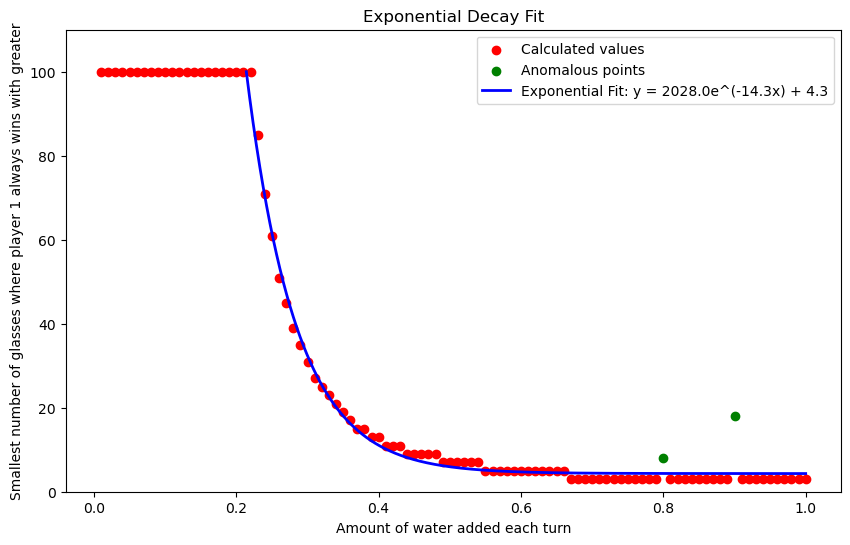

Exponential Fit: z = 1869.8e^(-13.9x) + 2.9


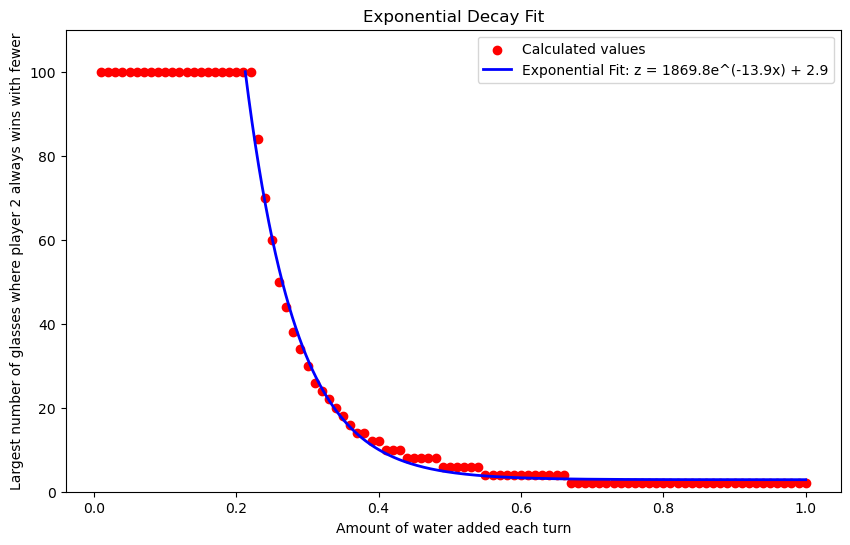

In [268]:
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.optimize import curve_fit

class Game:
    def __init__(self, n, do_outputs=True, k=2, glass_capacity=1.0, water_to_add=0.5):
        self.do_outputs = do_outputs # Whether or not to print text as the game runs
        self.n = n  # Total number of glasses
        self.k = k # Number of adjacent glasses thrown out each turn
        self.glass_capacity = glass_capacity  # Capacity of each glass in pints
        self.water_to_add = water_to_add
        self.glasses = [0.0] * n  # Initialize all glasses as empty
        self.turn = 1  # Turn counter (Player 1 starts)
        self.turn_count = 0  # Track the number of turns
    
    def player1_move(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = self.water_to_add
        print(f"Player 1 is adding {water_to_add} pints of water.")
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            for i in range(self.n // 2):
                self.glasses[2 * i] += water_to_add / (self.n // 2)
            return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > self.glass_capacity - self.water_to_add]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                print(f"Glass number {target_glass + 1} has overflown. Player 1 has won.")
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    print(f"Glass number {i + 1} has overflown. Player 1 has won.")
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player1_move_silent(self):
        # Player 1 adds 0.5 pints of water
        water_to_add = self.water_to_add
        winning_amount = self.glass_capacity - self.water_to_add
        # Check if this is the first turn, and begin filling every other glass
        if self.turn_count == 0:
            for i in range(self.n // 2):
                self.glasses[2 * i] += water_to_add / (self.n // 2)
            return False # Player 1 has not won on this turn
        # Check if any glass has more than 0.5 pints of water
        target_glasses = [i for i, water in enumerate(self.glasses) if water > winning_amount]
        if target_glasses:
            # If there are glasses with more than 0.5 pints, add all water to the first one
            target_glass = target_glasses[0]
            self.glasses[target_glass] += water_to_add
            if self.glasses[target_glass] > self.glass_capacity:
                return True  # Player 1 has won on this turn
        else:
            # Otherwise, distribute water evenly among the fullest glasses
            max_water = max(self.glasses)
            target_glasses = [i for i, water in enumerate(self.glasses) if water == max_water]
            water_per_glass = water_to_add / len(target_glasses)
            for i in target_glasses:
                self.glasses[i] += water_per_glass
                if self.glasses[i] > self.glass_capacity:
                    return True  # Player 1 has won on this turn
        return False # Player 1 has not won on this turn
    
    def player2_move(self):
        # Player 2 selects two adjacent glasses and empties them
        print("Player 2 is emptying two adjacent glasses")
        if self.n == 1:
            self.glasses[0] = 0.0
            print(f"Glasses 1 and 1 have been emptied")
        else:
            # Finds the pair of adjacent glasses with the most water in them
            max_total = 0
            best_pair = (0, 1)
            for i in range(self.n):
                total = self.glasses[i] + self.glasses[(i + 1) % self.n]
                if total > max_total:
                    max_total = total
                    best_pair = (i, (i + 1) % self.n)
            # Empty the selected glasses
            self.glasses[best_pair[0]] = 0.0
            self.glasses[best_pair[1]] = 0.0
            print(f"Glasses {best_pair[0] + 1} and {best_pair[1] + 1} have been emptied")
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            print("All glasses are empty, and the starting position has repeated. Player 2 wins")
            return True
        return False
    
    def player2_move_silent(self):
        # Player 2 selects two adjacent glasses and empties them
        if self.n == 1:
            self.glasses[0] = 0.0
        else:
            # Finds the pair of adjacent glasses with the most water in them
            max_total = 0
            best_pair = (0, 1)
            for i in range(self.n):
                total = self.glasses[i] + self.glasses[(i + 1) % self.n]
                if total > max_total:
                    max_total = total
                    best_pair = (i, (i + 1) % self.n)
            # Empty the selected glasses
            self.glasses[best_pair[0]] = 0.0
            self.glasses[best_pair[1]] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def player2_move_silent_fast(self):
        # Player 2 selects the first non-empty glass and the one after it
        best_pair = (0, 1)
        for i in range(self.n):
            if self.glasses[i] != 0:
                best_pair = [i, (i + 1) % self.n]
                break
        self.glasses[best_pair[0]] = 0.0
        self.glasses[(best_pair[0] + 1) % self.n] = 0.0
        # Check if all glasses are empty and it's not the first turn
        if all(glass == 0.0 for glass in self.glasses) and self.turn_count > 0:
            return True
        return False
    
    def play(self, max_turns=500):
        # Break into silent/non-silent cases:
        if self.do_outputs == True:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                print(f"\nTurn {turn}:")
                print(f"Current glass states: {[round(glass, 16) for glass in self.glasses]}")
                if self.turn == 1:
                    if self.player1_move():
                        return "Player 1 wins!"
                else:
                    if self.player2_move():
                        return "Player 2 wins!"
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return "Player 2 wins (no glasses overflowed after maximum turns)"
        else:
            # Simulate the game for a maximum number of turns
            for turn in range(1, max_turns + 1):
                if self.turn == 1:
                    if self.player1_move_silent():
                        return 1
                else:
                    if self.player2_move_silent_fast():
                        return 2
                # Switch turns
                self.turn = 3 - self.turn
                self.turn_count += 1
            # If the game reaches the maximum number of turns without any glasses overflowing, player 2 wins
            return 2

def compute_game_results(max_n, max_i, resolution):
    results = []
    for i in range(1, 25):
        iresults = []
        start_time = time.time()
        for n in range(1, max_n + 1):
            game = Game(n, False, 2, 1.0, i / resolution)
            result = game.play(100 + (2 * n))
            iresults.append(result)
        results.append(iresults)
        end_time = time.time()
        print(f"With {i / resolution} pints of water, took {end_time - start_time} seconds")
    start_time = time.time()
    for i in range(25, max_i + 1):
        iresults = []
        for n in range(1, 100 + 1):
            game = Game(n, False, 2, 1.0, i / resolution)
            result = game.play(100 + (2 * n))
            iresults.append(result)
        results.append(iresults)
    end_time = time.time()
    print(f"The remaining pints of water took {end_time - start_time} seconds")
    return results

def last_two_index_plus_one(list):
    last_index = -1
    for i in range(len(list)):
        if list[i] == 2:
            last_index = i
    return last_index + 1 if last_index != -1 else 0

def first_one_index_minus_one(list):
    for i in range(len(list)):
        if list[i] == 1:
            return i - 1
    return 100

MAX_I = 100
RESOLUTION = 100
MAX_N = 100

xs = [i / RESOLUTION for i in range(1, MAX_I + 1)]
print("Computing game results")
RESULTS = compute_game_results(MAX_N, MAX_I, RESOLUTION)
print("Analysing results for player 1 wins")
ys = [last_two_index_plus_one(result) for result in RESULTS]
print("Analysing results for player 2 wins")
zs = [first_one_index_minus_one(result) for result in RESULTS]

x_data = xs
y_data = ys

# Detect transition from constant to decay
def find_transition_index(y_data, tolerance=5):
    baseline = y_data[0]
    for i, y in enumerate(y_data):
        if abs(y - baseline) > tolerance:
            return i
    return len(y_data) - 1

transition_idx = find_transition_index(y_data)
x_transition = x_data[transition_idx]

# Fit exponential decay to non-constant portion
x_decay = x_data[transition_idx:]
y_decay = y_data[transition_idx:]

def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

params, _ = curve_fit(exp_decay, x_decay, y_decay, p0=[100, 10, 3])
a, b, c = params
print(f"Exponential Fit: y = {a:.1f}e^(-{b:.1f}x) + {c:.1f}")

# Find where the curve would reach y=100
def find_x_for_y(target_y, a, b, c):
    return np.log((target_y - c)/a) / -b

x_start = find_x_for_y(100, a, b, c)

# Filter out anomalous points from main data
x_data = [x for i, x in enumerate(x_data) if (i + 1) not in {80, 90}]
y_data = [y for i, y in enumerate(y_data) if (i + 1) not in {80, 90}]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', label='Calculated values')  # All points in red

# Plot anomalous points
anomalous_points = [(0.8, 8), (0.9, 18)]
anomalous_x = [point[0] for point in anomalous_points]
anomalous_y = [point[1] for point in anomalous_points]
plt.scatter(anomalous_x, anomalous_y, color='green', label='Anomalous points')

# Plot the extended curve
x_fit_extended = np.linspace(x_start, max(x_data), 500)
y_fit_extended = exp_decay(x_fit_extended, a, b, c)
plt.plot(x_fit_extended, y_fit_extended, 'b-', linewidth=2, label=f'Exponential Fit: y = {a:.1f}e^(-{b:.1f}x) + {c:.1f}')
plt.title("Exponential Decay Fit")
plt.xlabel("Amount of water added each turn")
plt.ylabel("Smallest number of glasses where player 1 always wins with greater")
plt.ylim(0, 110)  # Add some padding at the top

plt.legend()
plt.show()

x_data = xs
z_data = zs

transition_idx = find_transition_index(z_data)
x_transition = x_data[transition_idx]

# Fit exponential decay to non-constant portion
x_decay = x_data[transition_idx:]
z_decay = z_data[transition_idx:]

def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

params, _ = curve_fit(exp_decay, x_decay, z_decay, p0=[100, 10, 3])
a, b, c = params
print(f"Exponential Fit: z = {a:.1f}e^(-{b:.1f}x) + {c:.1f}")

# Find where the curve would reach y=100
def find_x_for_z(target_z, a, b, c):
    return np.log((target_z - c)/a) / -b

x_start = find_x_for_z(100, a, b, c)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_data, z_data, color='red', label='Calculated values')  # All points in red

# Plot the extended curve
x_fit_extended = np.linspace(x_start, max(x_data), 500)
z_fit_extended = exp_decay(x_fit_extended, a, b, c)
plt.plot(x_fit_extended, z_fit_extended, 'b-', linewidth=2, label=f'Exponential Fit: z = {a:.1f}e^(-{b:.1f}x) + {c:.1f}')
plt.title("Exponential Decay Fit")
plt.xlabel("Amount of water added each turn")
plt.ylabel("Largest number of glasses where player 2 always wins with fewer")
plt.legend()
plt.ylim(0, 110)  # Add some padding at the top
plt.show()

### Investigating the beginning plateau

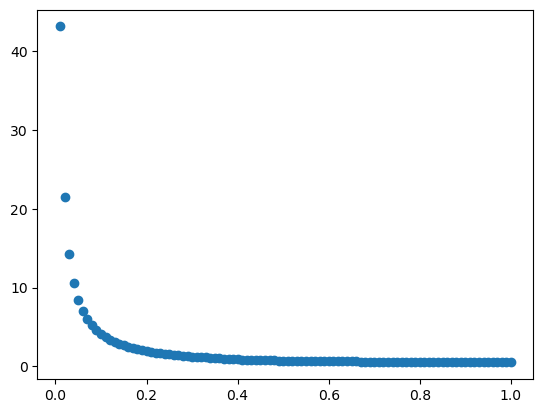

In [309]:
import matplotlib.pyplot as plt
import numpy as np

def smallest_n(x):
    if x > 0.1:
        total = 0
        n = 1
        while 1 - (x * total) >= 0:
            total += 1 / n
            n += 1
        return n
    else:
        return np.exp(np.power(x, -1) - 0.57721566490153286060651209008240243104215933593992)

xs = [i / 100 for i in range(100, 0, -1)]
ys = []
for x in xs:
    start_time = time.time()
    ys.append(smallest_n(x))
    end_time = time.time()

logys = [np.log10(y) for y in ys]
plt.scatter(xs, logys)
plt.show()

### Computing the sum

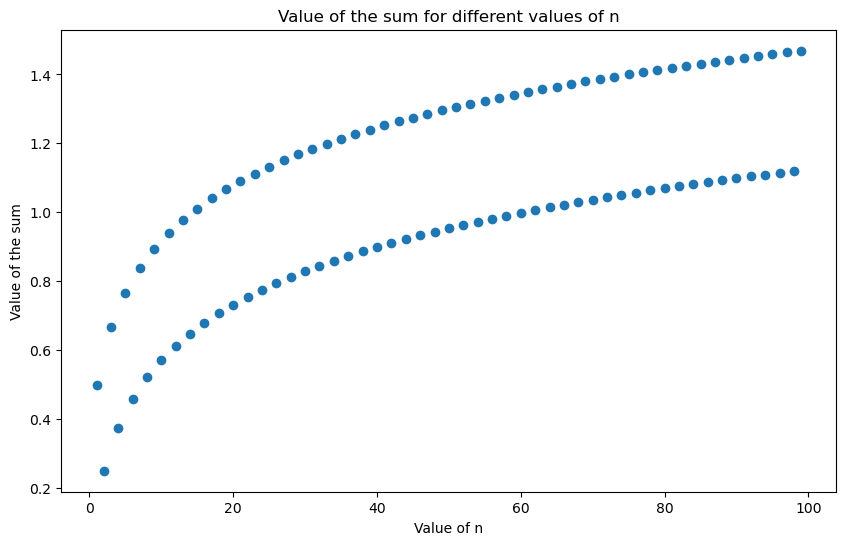

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0.5, 0.25, 0.6666666666666666, 0.375, 0.7666666666666666, 0.4583333333333333, 0.8380952380952381, 0.5208333333333333, 0.8936507936507936, 0.5708333333333333, 0.9391053391053391, 0.6125, 0.9775668775668775, 0.6482142857142856, 1.010900210900211, 0.6794642857142856, 1.0403119756060932, 0.7072420634920635, 1.0666277650797773, 0.7322420634920634, 1.090437288889301, 0.7549693362193362, 1.1121764193240837, 0.7758026695526695, 1.1321764193240837, 0.7950334387834388, 1.1506949378426024, 0.8128905816405816, 1.167936317152947, 0.8295572483072482, 1.1840653494110116, 0.8451822483072482, 1.1992168645625267, 0.859888

In [286]:
import matplotlib.pyplot as plt
import numpy as np

def f(i):
    return 2 / (n - 2 * i)

def final_value(n):
    output = 0
    i = 0
    while 2*i < n:
        output += 0.5/(n-(2*i))
        i += 1
    return output

N = 100

xs = [n for n in range(1, 100)]
ys = [final_value(x) for x in xs]

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys)
plt.title("Value of the sum for different values of n")
plt.xlabel("Value of n")
plt.ylabel("Value of the sum")
plt.show()
print(xs)
print(ys)